In [1]:
from keras.datasets import boston_housing
(X_train, y_trian), (X_test, y_test) = boston_housing.load_data()

In [2]:
print(X_train.shape, X_test.shape) # 학습용:검증용 404:102
print(X_train.shape[1]) # 독립변수의 개수

(404, 13) (102, 13)
13


In [3]:
y_trian[0:10] # 종속변수: 주택의 가격(천달러)

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

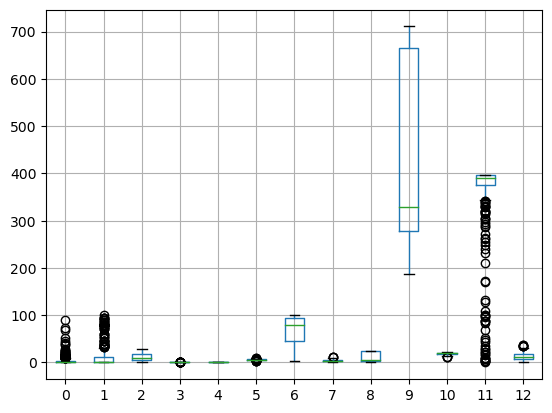

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(X_train).boxplot()
plt.show()

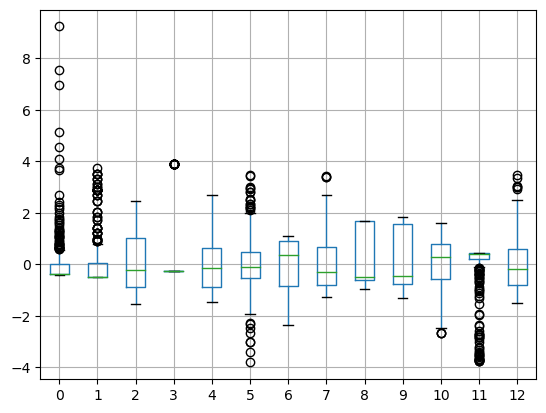

In [5]:
#스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
pd.DataFrame(X_train_scaled).boxplot()
plt.show()

In [6]:
#64개의 노드를 가진 은닉층 2개의 신경망 모델
from keras import models, layers
def build_model():
    model = models.Sequential()
    # Dense(output, activation, input_shape)
    model.add(layers.Dense(64, activation='relu', 
                           input_shape=(X_train.shape[1], ))) # 독립변수의 개수
    model.add(layers.Dense(64, activation='relu'))
    # 출력층
    model.add(layers.Dense(1)) # activation='linear'
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [7]:
#모델 생성
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


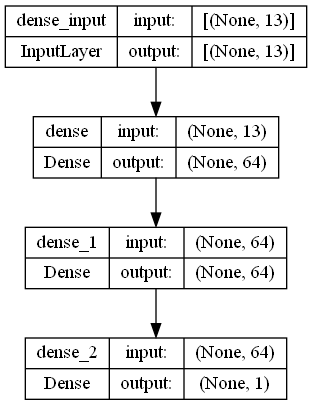

In [11]:
from keras.utils import plot_model
plot_model(model,show_shapes=True)

In [8]:
#모델 학습
hist = model.fit(X_train_scaled, y_trian, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
7/7 [==============================] - 1s 4ms/step - loss: 570.0848 - mae: 22.0568
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 528.2178 - mae: 21.0787
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 487.8974 - mae: 20.1207
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 443.0112 - mae: 19.0299
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 394.1432 - mae: 17.7749
Epoch 6/100
7/7 [==============================] - 0s 4ms/step - loss: 342.1132 - mae: 16.3933
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 289.8792 - mae: 14.8848
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 239.8966 - mae: 13.3088
Epoch 9/100
7/7 [==============================] - 0s 4ms/step - loss: 193.3818 - mae: 11.6967
Epoch 10/100
7/7 [==============================] - 0s 6ms/step - loss: 153.8122 - mae: 10.2072
Epoch 11/100
7/7 [==============================]

In [9]:
#검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test_scaled, y_test, verbose=1)
print(mse)
print(mae)

4/4 [==============================] - 0s 2ms/step - loss: 22.5426 - mae: 2.9157
22.542612075805664
2.91572904586792


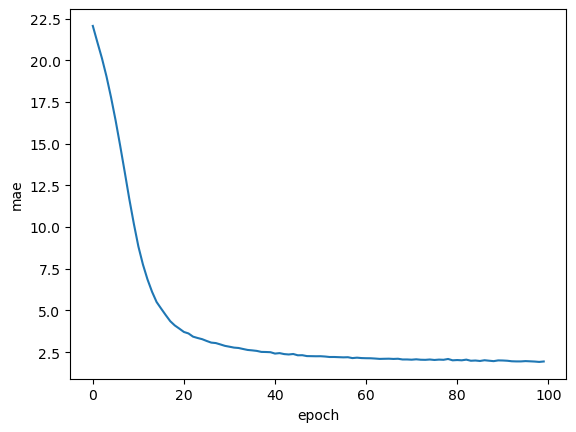

In [10]:
plt.plot(hist.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [12]:
#모델 저장
model.save('mymodel.h5')

In [13]:
#모델 불러오기
from keras.models import load_model
del model
model = load_model('mymodel.h5')